# Atmospheric Attenuation

In [2]:
%matplotlib inline
import os
from pathlib import Path
import sys
sys.path.append(str(Path(os.getcwd()).parent.parent))
import numpy as np
import matplotlib.pyplot as plt
from src.utils import atmospheric_absorption, print_code
from IPython.core.display import HTML

As the noise is propogated through the air, the noise is reduced

In [3]:
HTML(print_code(atmospheric_absorption))

Lets visualize the atmospheric absorption for different relative humidities and frequencies.

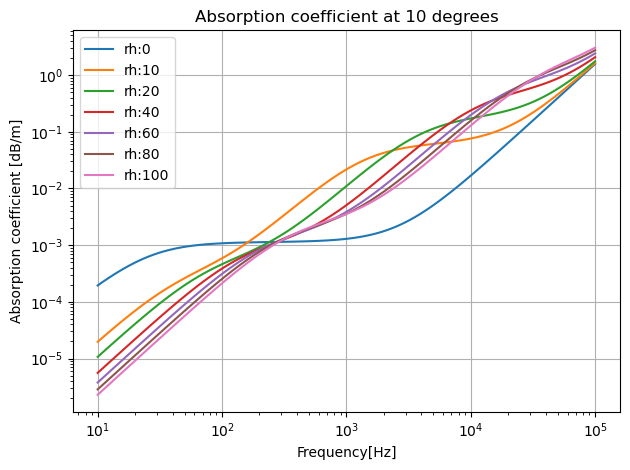

In [4]:
t = 10 # temperature
fs = np.logspace(1, 5, num=100, endpoint=True, base=10) # frequency range
alphas = np.zeros(fs.shape) # initiate alpha
rhs = (0, 10, 20, 40, 60, 80, 100) # relative humidity range

plt.figure()
for rh in rhs:
    for i, f in enumerate(fs):
        alphas[i] = atmospheric_absorption(f, t, rh)
    plt.loglog(fs, alphas, label='rh:%d'%rh)
plt.title(f'Absorption coefficient at {t} degrees')
plt.grid(True)
plt.xlabel('Frequency[Hz]')
plt.ylabel('Absorption coefficient [dB/m]')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

The noise power level thus decreases linearly with distance and can be calculated as $A_{atm} = \alpha \cdot d$.

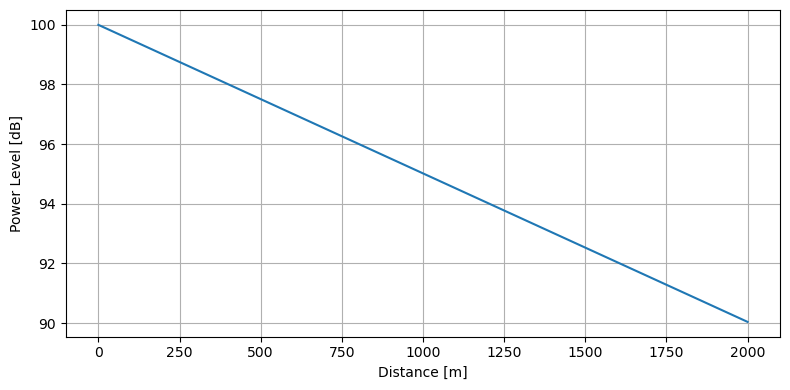

In [7]:
d = np.linspace(0, 2000)
A0 = 100

A = A0 - atmospheric_absorption(1000, 20, 70) * d

plt.figure(figsize=(8,4))
plt.plot(d, A)
plt.xlabel("Distance [m]")
plt.ylabel("Power Level [dB]")
plt.grid()
plt.tight_layout()
plt.show()

From the plot it can be seen the the effect is minimal.